# Loan Approval Prediction Using Machine Learning

In this Notebook , We are going to solve the Loan Approval Prediction.This is a Classification problem  in which we need to classify whether the loan will be approved or not. 

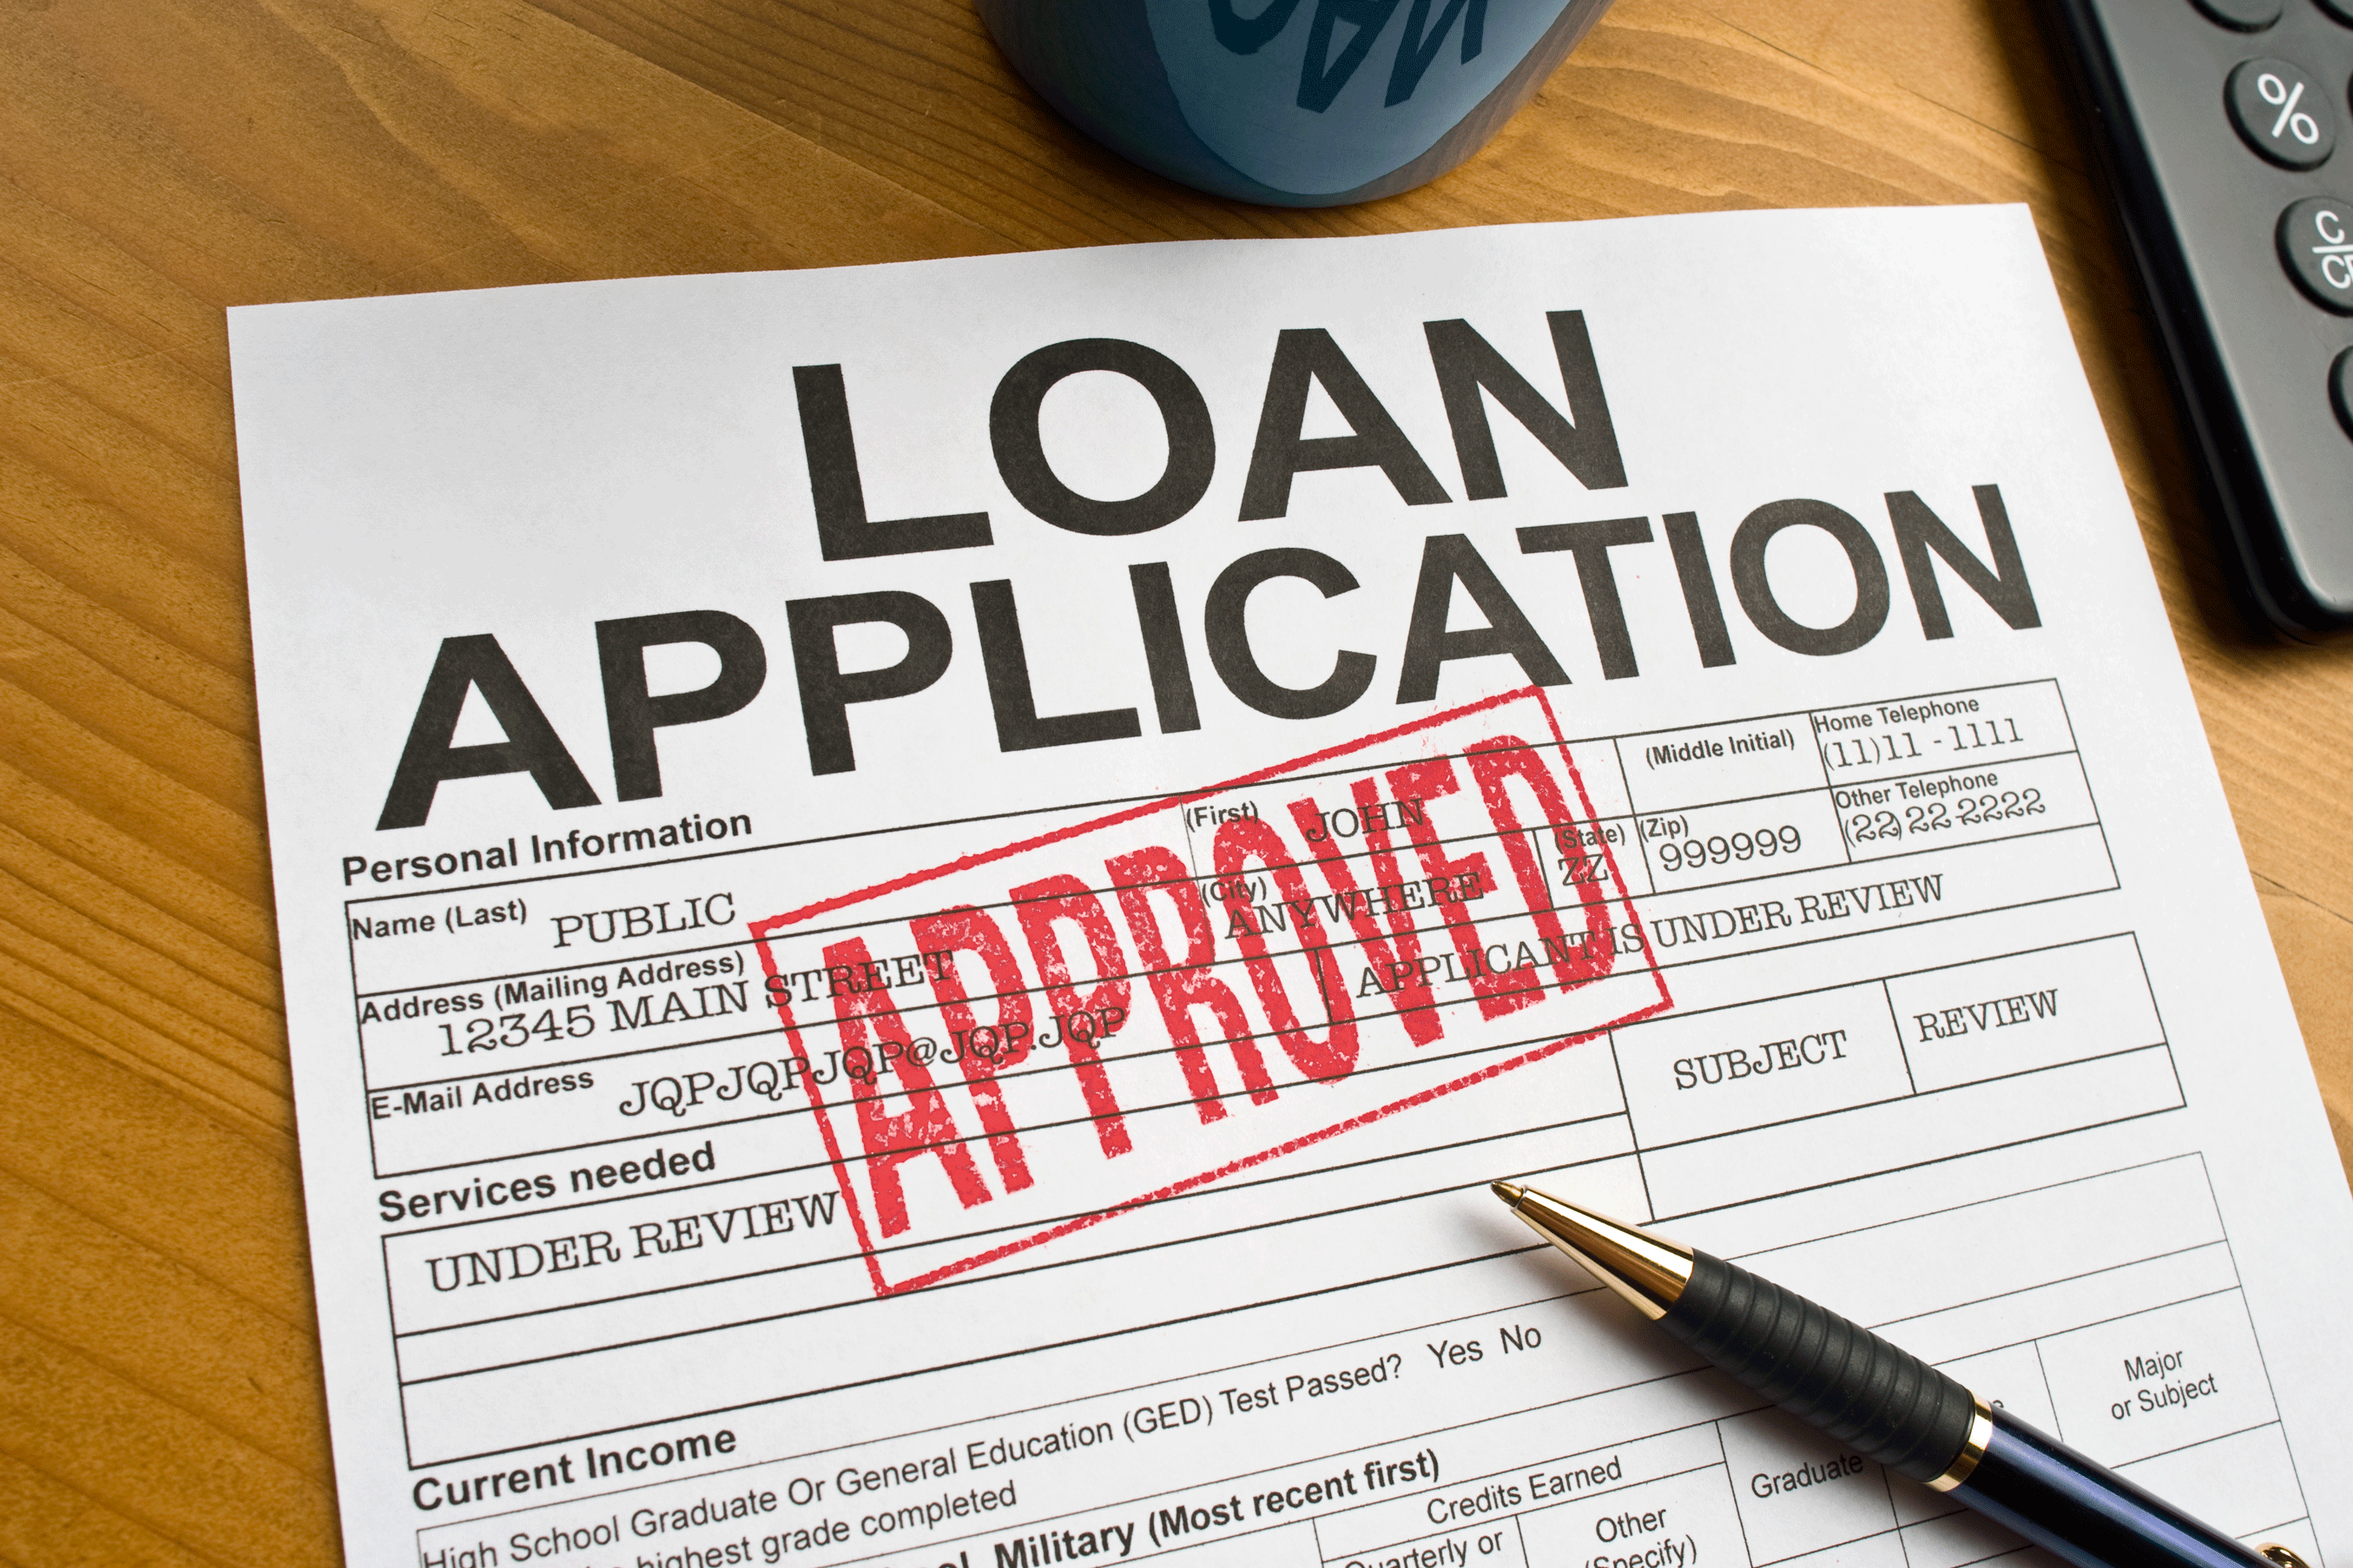

## Problem Statement

    
A loan is a bank's main source of revenue. The profits earned through loans account for most of the bank's profits. Even though the bank accepts the loan following a lengthy verification and testimony process, there is no guarantee that the chosen candidate is the right one. When done manually, this operation takes a long time. We can predict whether a given hopeful is safe or not, and the entire testimonial process is automated using machine literacy. Loan Prognostic is beneficial to both bank retainers and hopefuls.

The Bank wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or No.

Yes: if the loan is approved No: if the loan is not approved So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

## About Dataset

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 614 rows and 13 columns.


## Importing Library

In [1]:
#import the all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB


## Data Collection

In [2]:
#loading the dataset into a pandas dataframe
loan_data = pd.read_csv("Loan Status Prediction.csv")

In [3]:
# Print the first five row of the dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Print the last five row of the dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


The dataset contains 13 features : 


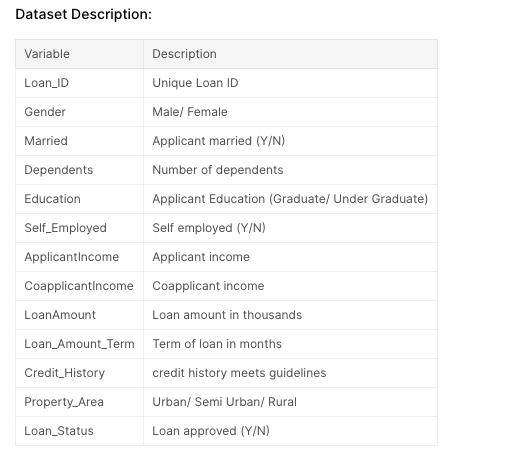

## Exploratory Data Analysis

In [5]:
# check the dataset shape
loan_data.shape

(614, 13)

As can be seen, 614 rows and 13 columns are there in the dataset

In [6]:
# chech the dataset of the datatype
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# statisticaly measure
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# check the number of missing value in the each columns
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Handeling the missing values---

loan_data.Gender.fillna(value=loan_data.Gender.mode()[0], axis=0, inplace =True )
loan_data.Married.fillna(value=loan_data.Married.mode()[0], axis=0, inplace =True )
loan_data.Dependents.fillna(value=loan_data.Dependents.mode()[0], axis = 0 , inplace = True)
loan_data.Self_Employed.fillna(value=loan_data.Self_Employed.mode()[0], axis = 0 ,inplace =True)
loan_data.LoanAmount.fillna(value = loan_data.LoanAmount.mean(), axis =0 , inplace = True)
loan_data.Loan_Amount_Term.fillna(value = loan_data.Loan_Amount_Term.median(), axis =0 , inplace = True)
loan_data.Credit_History.fillna(value =loan_data.Credit_History.mode()[0], axis =0, inplace=True)

In [10]:
# check the missing value 
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As can see, all the missing value are zero 

In [11]:
# Dependent column values
loan_data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
# Dependents columns replaceing value 3+ to 4

loan_data.replace(to_replace="3+" , value="4", inplace = True)

In [13]:
# Dependent column values
loan_data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [14]:
# drop the loan_id columns
loan_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

## Data Visualisation

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

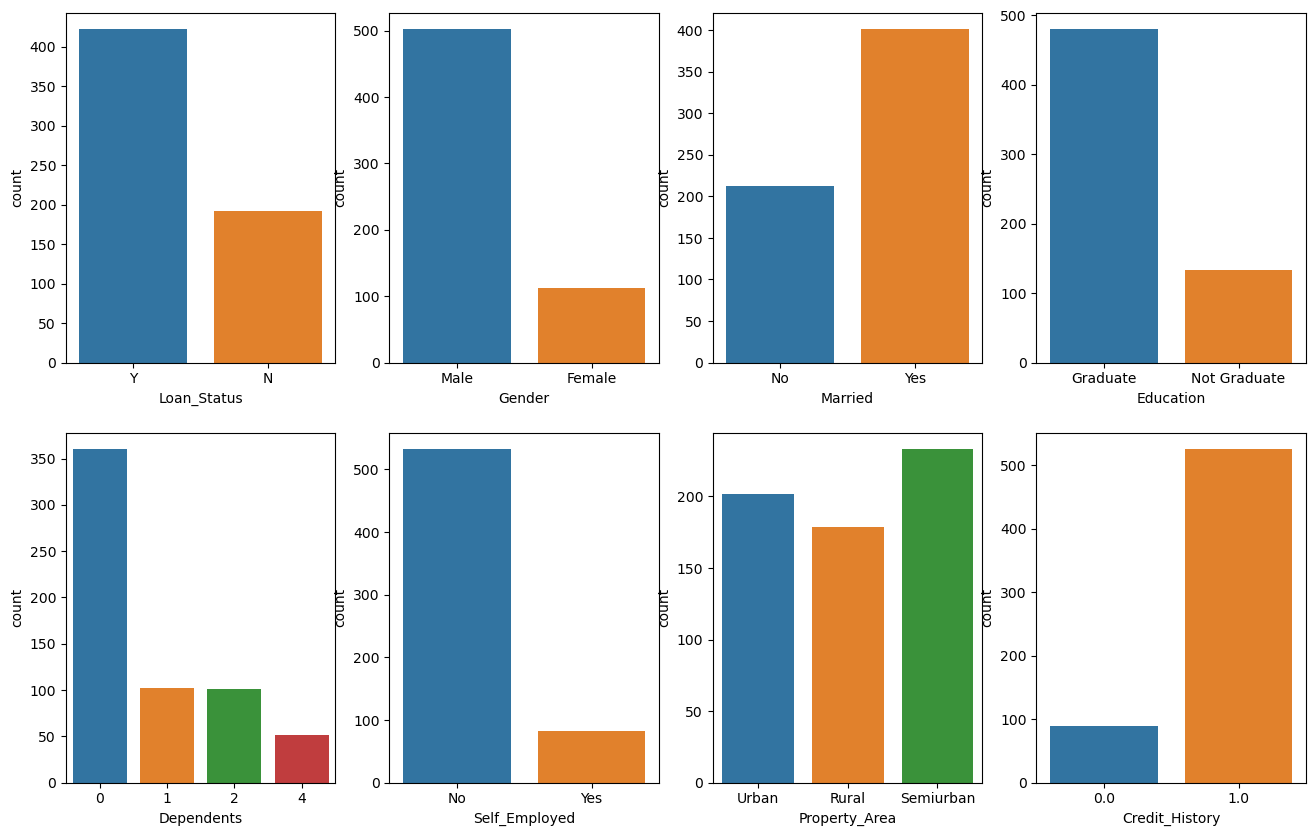

In [15]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = loan_data, ax=ax[0][0])
sns.countplot(x='Gender', data=loan_data, ax=ax[0][1])
sns.countplot(x='Married', data=loan_data, ax=ax[0][2])
sns.countplot(x='Education', data=loan_data, ax=ax[0][3])
sns.countplot(x='Dependents', data=loan_data, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=loan_data, ax=ax[1][1])
sns.countplot(x='Property_Area', data=loan_data, ax=ax[1][2])
sns.countplot(x='Credit_History', data=loan_data, ax=ax[1][3])

As can be seen, More Loans are approved Vs Rejected Count of Male applicants is more than Female Count of Married applicant is more than Non-married Count of graduate is more than non-Graduate Count of self-employed is less than that of Non-Self-employed Maximum properties are located in Semiurban areas Credit History is present for many applicants The count of applicants with several dependents=0 is maximum.

<AxesSubplot:xlabel='Education', ylabel='count'>

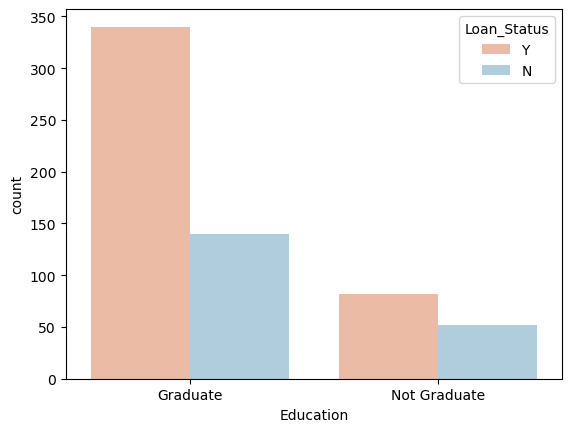

In [16]:
# Education and Loan Status
sns.countplot(x="Education", hue = "Loan_Status", data = loan_data, palette="RdBu")

<AxesSubplot:xlabel='Gender', ylabel='count'>

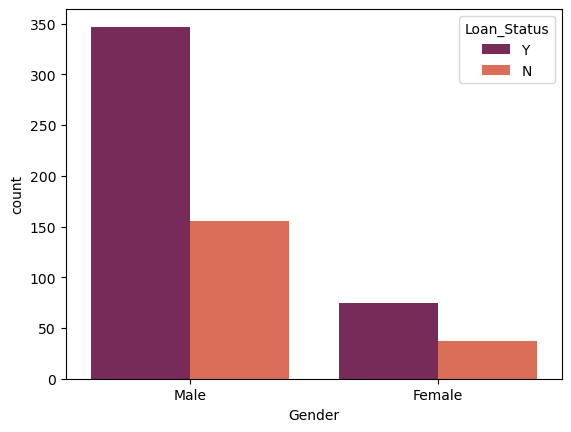

In [17]:
# Gender and Loan status
sns.countplot(x = "Gender" , hue = "Loan_Status", data= loan_data, palette= "rocket")

<AxesSubplot:xlabel='Married', ylabel='count'>

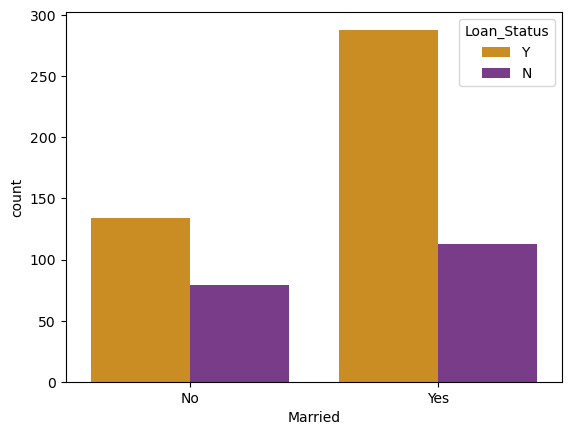

In [18]:
# Marital status and Loan Status
sns.countplot(x = "Married" , hue = "Loan_Status", data= loan_data, palette= "CMRmap_r")

### Correlation between Columns

<AxesSubplot:>

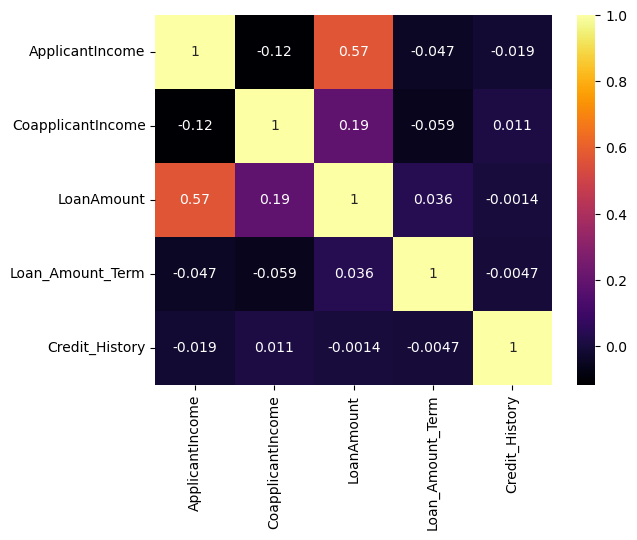

In [19]:
# correlation numerical colmns
sns.heatmap(loan_data.corr(), data = loan_data, annot= True , cmap='inferno')

### Histogram Distribution

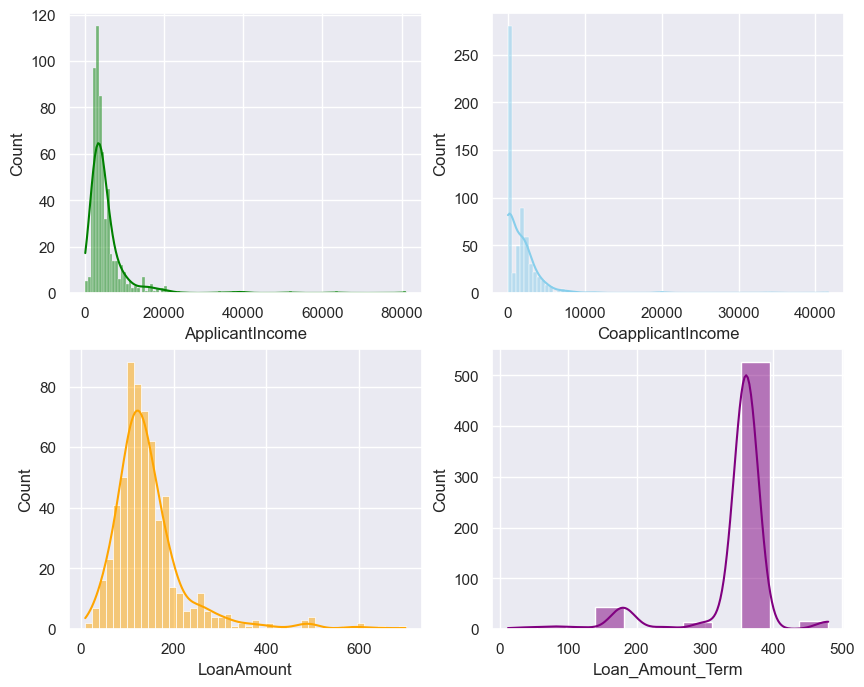

In [20]:
# Distribution numerical variable using the Histogram 

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

### Box plot

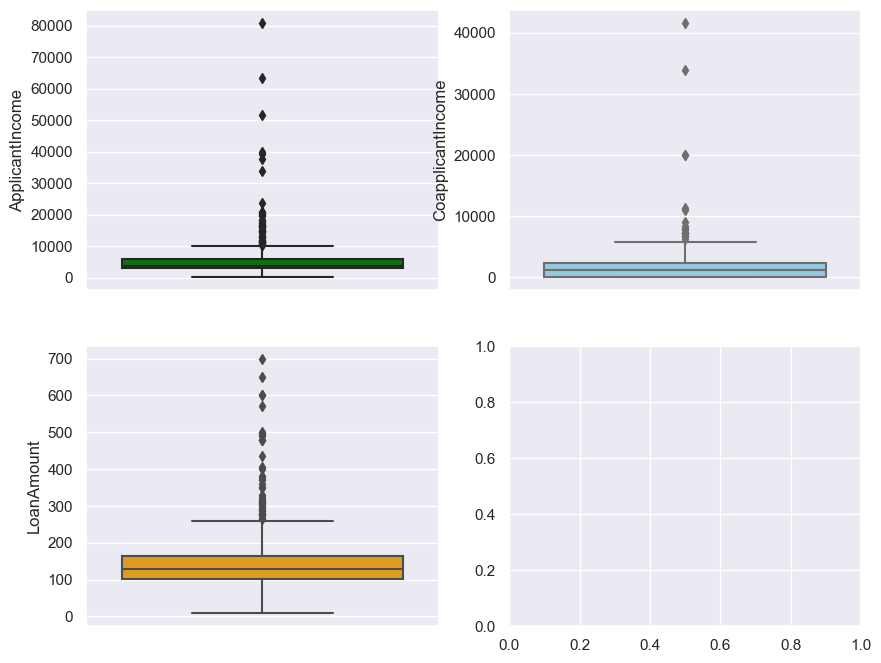

In [21]:
#Box plot using to show outliers

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=loan_data, y="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=loan_data, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=loan_data, y="LoanAmount", ax=axs[1, 0], color='orange');

The distribution of Applicant Income, Co.Applicant Income and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).

The distribution of Loan Amount Term is negativly skewed and it has outliers.

### Skewed Distribution Treatment

In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.

I will use square root transformation to normalized the distribution.

In [22]:
# Squre root transformation

loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)
loan_data.Loan_Amount_Term = np .sqrt(loan_data.Loan_Amount_Term)

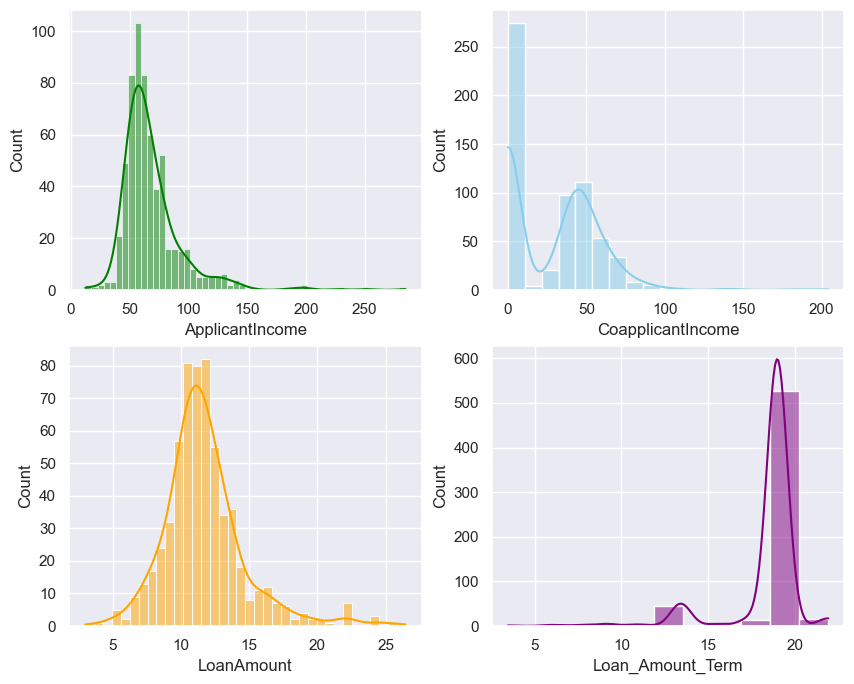

In [23]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

As has been seen, the histogram distribution using the Squr root transformation better show compare to orignal. 

### Label Encoding

In [24]:
lab_end = LabelEncoder()

In [25]:
columns =["Gender","Married","Education","Self_Employed", "Property_Area","Loan_Status"] 

loan_data[columns] = loan_data[columns].apply(lab_end.fit_transform)

In [26]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,18.973666,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,18.973666,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,18.973666,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,18.973666,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,18.973666,1.0,2,1


In [27]:
# seprating the data in x and y
x = loan_data.drop(columns = "Loan_Status", axis = 1)
y = loan_data["Loan_Status"]

### Train and Test Split

In [28]:
#Train the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2 , stratify=y)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (552, 11) (62, 11)


## Build Machine Learing Model

### Logistic Regression

In [50]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") #'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
log_model.fit(x_train,y_train)

log_prediction = log_model.predict(x_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))


              precision    recall  f1-score   support

           0       0.47      0.82      0.60        11
           1       0.95      0.80      0.87        51

    accuracy                           0.81        62
   macro avg       0.71      0.81      0.74        62
weighted avg       0.87      0.81      0.82        62

[[ 9  2]
 [10 41]]
Logistic Regression accuracy_score: 80.65% 


### Support Vector Machine

In [68]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(x_train, y_train)

svm_prediction = svm_model.predict(x_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))

              precision    recall  f1-score   support

           0       0.47      0.69      0.56        13
           1       0.91      0.80      0.85        49

    accuracy                           0.77        62
   macro avg       0.69      0.74      0.71        62
weighted avg       0.82      0.77      0.79        62

[[ 9  4]
 [10 39]]
SVM accuracy_score : 77.42%


### Decision Tree

In [72]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter = "random")
dt_model.fit(x_train,y_train)

dt_prediction = dt_model.predict(x_test)

print(classification_report(dt_prediction, y_test))
print( confusion_matrix(dt_prediction,y_test))

dt_acc = accuracy_score(dt_prediction,y_test)
print("Decision_tree accuracy_score: {:.2f}% ". format(dt_acc*100))


              precision    recall  f1-score   support

           0       0.37      0.64      0.47        11
           1       0.91      0.76      0.83        51

    accuracy                           0.74        62
   macro avg       0.64      0.70      0.65        62
weighted avg       0.81      0.74      0.77        62

[[ 7  4]
 [12 39]]
Decision_tree accuracy_score: 74.19% 


### Random Forest Model

In [139]:

rf_model = RandomForestClassifier(criterion='entropy', n_estimators=120)
rf_model.fit(x_train,y_train)

rf_prediction = rf_model.predict(x_test)

print(classification_report(rf_prediction, y_test))
print( confusion_matrix(rf_prediction,y_test))

rf_acc = accuracy_score(rf_prediction,y_test)
print("Random_forest accuracy_score: {:.2f}% ". format(rf_acc*100))

              precision    recall  f1-score   support

           0       0.47      0.64      0.55        14
           1       0.88      0.79      0.84        48

    accuracy                           0.76        62
   macro avg       0.68      0.72      0.69        62
weighted avg       0.79      0.76      0.77        62

[[ 9  5]
 [10 38]]
Random_forest accuracy_score: 75.81% 


### K-Nearest Neighbour (KNN)

In [116]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train,y_train)

knn_prediction = knn_model.predict(x_test)

print(classification_report(knn_prediction, y_test))
print( confusion_matrix(knn_prediction,y_test))

knn_acc = accuracy_score(knn_prediction,y_test)
print("KNN accuracy_score: {:.2f}% ". format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10         1
           1       1.00      0.70      0.83        61

    accuracy                           0.71        62
   macro avg       0.53      0.85      0.46        62
weighted avg       0.98      0.71      0.82        62

[[ 1  0]
 [18 43]]
KNN accuracy_score: 70.97% 


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Naive Bayes

#### Categorical NB

In [140]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)

NBclassifier1_prediction = NBclassifier1.predict(x_test)

print(classification_report(NBclassifier1_prediction, y_test))
print( confusion_matrix(NBclassifier1_prediction,y_test))

NBclassifier1_acc = accuracy_score(NBclassifier1_prediction,y_test)
print("Categorical NB accuracy_score: {:.2f}% ". format(NBclassifier1_acc*100))

              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.93      0.80      0.86        50

    accuracy                           0.79        62
   macro avg       0.70      0.78      0.72        62
weighted avg       0.84      0.79      0.81        62

[[ 9  3]
 [10 40]]
Categorical NB accuracy_score: 79.03% 


## Model Comparison 

In [142]:
compare_model = pd.DataFrame({'Model': ['Logistic Regression',"Support Vector Machine", "Decision Tree", 
                             "Random Forest", "K-Nearest Neighbour", " Categorical NB"],
                  'Accuracy_Score': [log_acc*100,svm_acc*100,dt_acc*100,rf_acc*100,knn_acc*100,
                                     NBclassifier1_acc*100]})


compare_model.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
0,Logistic Regression,80.645161
5,Categorical NB,79.032258
1,Support Vector Machine,77.419355
3,Random Forest,75.806452
2,Decision Tree,74.193548
4,K-Nearest Neighbour,70.967742


It can seen that, all the model accuracy is more than 70%.

The highest accuracy is 81% of the Linear Regression.